In [1]:
import numpy as np
import matplotlib.pyplot as plt

Función para obtener los valores de la variable target $y=-(x-2)^2+3+0.2\sin(16x)$

In [2]:
def fun(x):
    N = len(x)
    sigma_epsilon = 1
    y = -(x-2)**2 + 3 +0.2*np.sin(16*x)
    epsilon = sigma_epsilon*np.random.randn(N)
    y = y + epsilon
    return y

Función de pérdida $L=\frac{1}{N}\sum_{i=1}^N(y_i-\hat{y}_i)^2$

In [3]:
def loss(y, y_pred):
    diff = y - y_pred
    return np.mean(diff**2)

Función de predicción $\hat{y}=w_1x^2 + w_2x + w_3$

In [4]:
def predict(X, w_vec):
    return X @ w_vec

Gradiente de la función de pérdida respecto a los parámetros: $\frac{dL}{dw_i}=\frac{dL}{d\hat{y}_i}\frac{d\hat{y}_i}{dw_i}=-2\sum_{i=1}^N(y_i-\hat{y}_i)(x_i^2+x_i+1)$

In [5]:
def gradient(X, y, y_pred):
    return -2*(y - y_pred) @ X

Algoritmo mini-batch

In [6]:
def mini_batch(X, y, w_vec, len_Xbatch, lr, epochs):
    N = len(y)
    MSE = []
    for i in range(epochs):
        for j in range(0, N, len_Xbatch):
            # Selecciono batch de filas del dataset
            Xbatch = X[j:j+len_Xbatch, :]
            # Paso forward utilizando el batch
            y_pred_j = predict(Xbatch, w_vec)
            # Paso backpropagation
            gradJ = gradient(Xbatch, y[j:j+len_Xbatch], y_pred_j)
            # Actualizacion de pesos
            w_vec = w_vec - lr*gradJ
        
        y_pred = predict(X, w_vec)        
        mse = loss(y, y_pred)
        MSE.append(mse)
        print("Epoch:", i, "MSE:", mse)

    return w_vec, MSE

### Llamada al algoritmo de mini-batch para minimizar la función de pérdida

In [7]:
# Definición del dataset
n = 10000
x = np.linspace(0, 4, n)
y = fun(x)
X = np.array([x**2, x, np.ones((n,))]).T

# inicialización random de los pesos 
w_vec0 = np.random.rand(3,)

#  Definición de hiperparáemtros del modelo
len_batch = round(n/5)
lr = 0.000005
epochs = 1000

# Llamada a la función mini-batch
w_vec, MSE = mini_batch(X, y, w_vec0, len_batch, lr, epochs)

# Pesos optimizados
print('Parámetros originales:', w_vec0)
print('Parámetros aprendidos:', w_vec)

Epoch: 0 MSE: 9.371364094938002
Epoch: 1 MSE: 25.759718154991734
Epoch: 2 MSE: 38.2878265241208
Epoch: 3 MSE: 44.04264192076925
Epoch: 4 MSE: 44.241847072690994
Epoch: 5 MSE: 40.97544900511335
Epoch: 6 MSE: 36.039643319924906
Epoch: 7 MSE: 30.661605559619087
Epoch: 8 MSE: 25.555267707695183
Epoch: 9 MSE: 21.06459984748254
Epoch: 10 MSE: 17.300509060163716
Epoch: 11 MSE: 14.243863544011477
Epoch: 12 MSE: 11.813676199527816
Epoch: 13 MSE: 9.907960368080227
Epoch: 14 MSE: 8.425797613368008
Epoch: 15 MSE: 7.277620425436142
Epoch: 16 MSE: 6.388690740939719
Epoch: 17 MSE: 5.699009633899597
Epoch: 18 MSE: 5.161609656704763
Epoch: 19 MSE: 4.7403219337233855
Epoch: 20 MSE: 4.407574258970091
Epoch: 21 MSE: 4.142463353592198
Epoch: 22 MSE: 3.929174174404802
Epoch: 23 MSE: 3.7557351216553463
Epoch: 24 MSE: 3.6130629404826395
Epoch: 25 MSE: 3.49424195543323
Epoch: 26 MSE: 3.3939854616957286
Epoch: 27 MSE: 3.3082351158085053
Epoch: 28 MSE: 3.2338631702117215
Epoch: 29 MSE: 3.1684506196405864
Epoch: 

Ploteo de resultados

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0, 0.5, 'y')

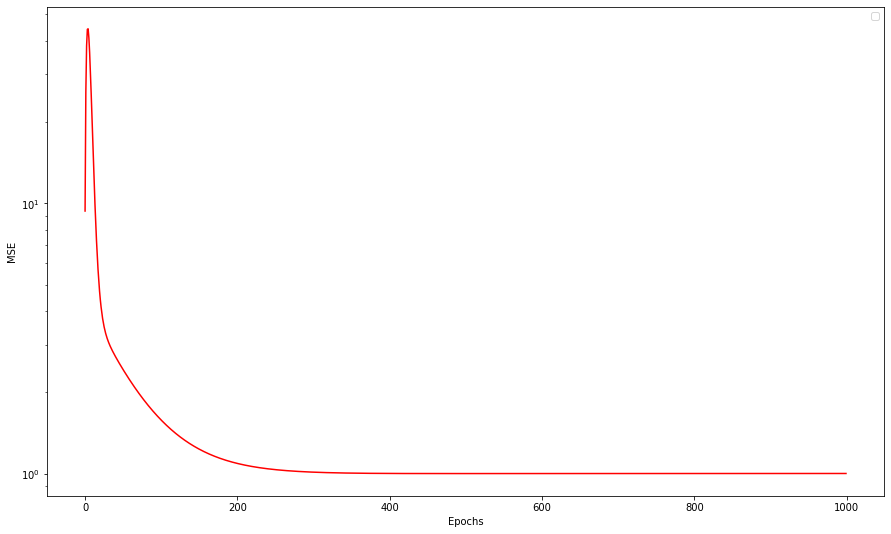

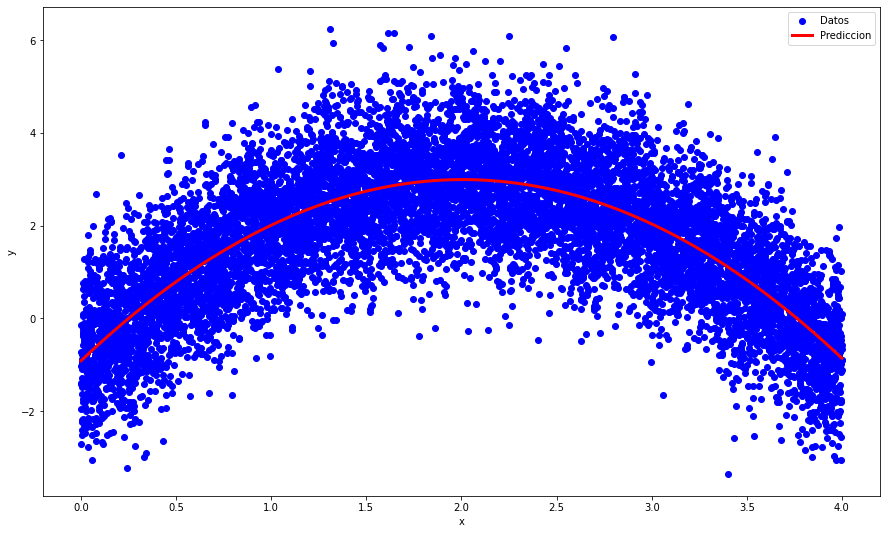

In [8]:
# Grafica MSE vs. epochs
fig1, axs1 = plt.subplots(1, sharey=True, figsize=(15, 9))
axs1.semilogy(np.arange(epochs), MSE, linewidth=1.5, color='r')
axs1.legend()
axs1.axes.set_xlabel('Epochs')
axs1.axes.set_ylabel('MSE')

# Grafica datos vs. prediccion
y_pred = predict(X, w_vec)
fig2, axs2 = plt.subplots(1, sharey=True, figsize=(15, 9))
axs2.scatter(x, y, color='b', label='Datos')
axs2.plot(x, y_pred, linewidth=3, color='r', label='Prediccion')
axs2.legend()
axs2.axes.set_xlabel('x')
axs2.axes.set_ylabel('y')